# Aim

Analyze data from the SEAL tests.

For the open-loop tests, fit different generic plant models to the data.

For the closed-loop tests, demonstrate the potential model problems.


In [113]:
# imports
import os
from os import path, listdir
import numpy as np
from matplotlib import pyplot as plt
import re
from toolz import pipe

In [152]:
import sys
sys.path.append("..")
from src.utils import genpsd

Running in simulation mode.


/Users/adityasengupta/research/ao/set-tt-control/notebooks/../src/optics/image.py:110: UserWarning: Exposure time in sim optics is not used yet.
  warnings.warn("Exposure time in sim optics is not used yet.")
/Users/adityasengupta/research/ao/set-tt-control/notebooks/../src/optics/image.py:118: UserWarning: Image propagation from the DM has not been implemented.
  warnings.warn("Image propagation from the DM has not been implemented.")


Recomputed interaction matrix and command matrix


In [76]:
datapath = path.join("..", "data")

In [175]:
# atm-vib
atmvib_path = path.join(datapath, "openloop")
atmvib_files = pipe(
    filter(lambda f: re.search("atm", f), listdir(atmvib_path)),
    lambda files: filter(lambda f: not re.search("time", f), files),
    list
)
len(atmvib_files)

44

In [189]:
atmvib_files[0]

'olatm_0vib_2scaledown_5_tt_stamp_21_08_2021_14_23_23.npy'

In [188]:
def analyze_atmvib(f, i=0, plot=True):
    atm = int(re.search("atm_\d+", f)[0][4:])
    vib = int(re.search("vib_\d+", f)[0][4:])
    if re.search("scaledown_\d+", f) is not None:
        sca = int(re.search("scaledown_\d+", f)[0][10:]) 
    else:
        sca = 10
    disturbance = np.load(path.join(datapath, "sims", "ol_atm_{0}_vib_{1}.npy".format(atm, vib))) / sca
    disturbance += np.random.normal(0, 0.01, size=disturbance.shape)
    response = np.load(path.join(atmvib_path, f))
    l = min(len(disturbance), len(response))
    freqs, p_in = genpsd(disturbance[:l, i], dt=0.01)
    freqs, p_re = genpsd(response[:l, i], dt=0.01)
    if plot:
        plt.loglog(freqs, p_in, label="Disturbance signal")
        plt.loglog(freqs, p_re, label="System response")
        plt.loglog(freqs, p_re / p_in, label="Plant frequency response")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Power (DM units^2/Hz)")
        plt.title("Frequency response for open-loop test, atm = {0}, vib = {1}".format(atm, vib))
        plt.legend()
        plt.show()
    return freqs, p_re / p_in

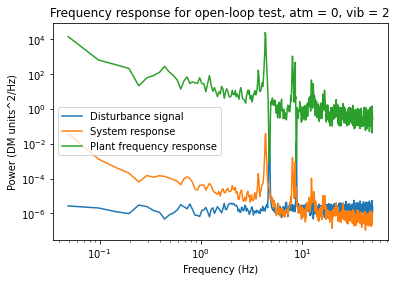

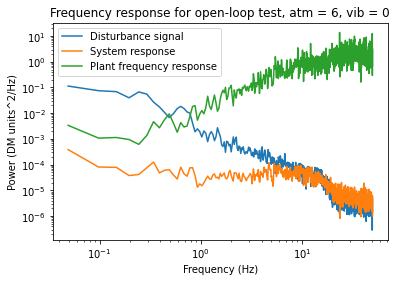

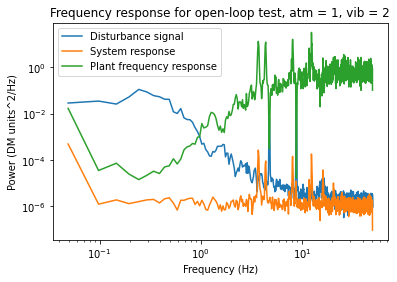

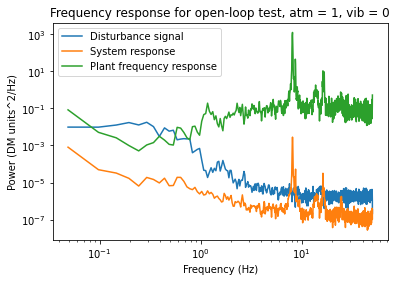

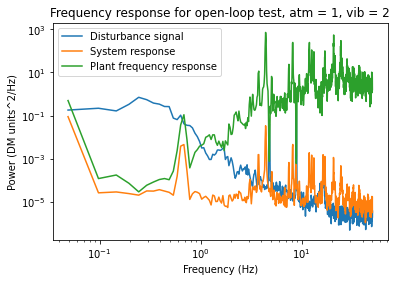

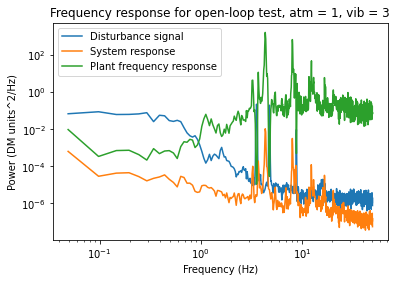

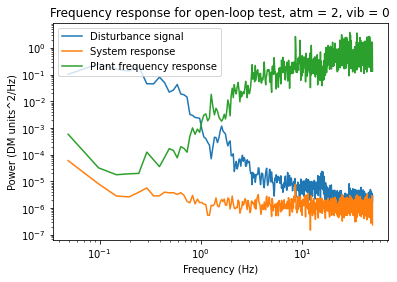

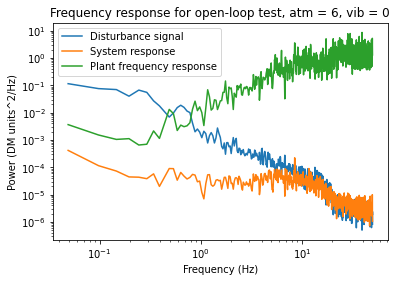

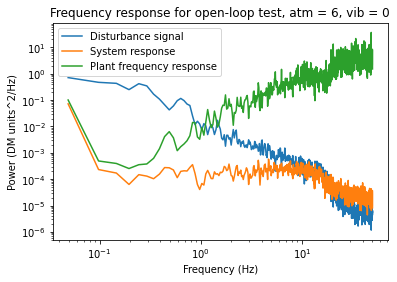

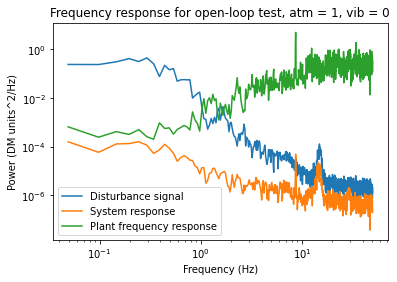

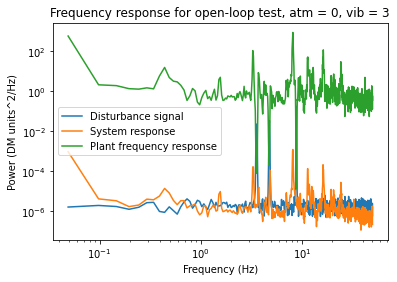

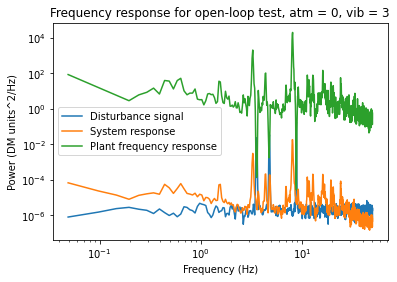

KeyboardInterrupt: 

In [190]:
for f in atmvib_files:
    analyze_atmvib(f, plot=True)

In [192]:
atmvib_files[5]

'olatm_1vib_3scaledown_5_tt_stamp_21_08_2021_14_32_49.npy'